In [31]:
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
%matplotlib inline
import seaborn as sns
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [32]:
df=pd.read_csv('file:///C:/Users/Md%20Asif%20Ikbal/Downloads/bank.csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [33]:
df.shape

(11162, 17)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [35]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
deposit      object
dtype: object

In [36]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [37]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [38]:
df.corr().describe().T

,count,mean,std,min,25%,50%,75%,max
age,7.0,0.161342,0.372119,-0.005278,-0.000287,0.002774,0.066234,1.0
balance,7.0,0.168504,0.368763,-0.013894,0.013939,0.022436,0.071553,1.0
day,7.0,0.141713,0.384727,-0.077232,-0.038746,-0.000762,0.073737,1.0
duration,7.0,0.129778,0.384305,-0.041557,-0.027054,-0.018511,0.011313,1.0
campaign,7.0,0.131979,0.389832,-0.102726,-0.045628,-0.013894,0.065864,1.0
pdays,7.0,0.188587,0.413511,-0.102726,-0.052312,0.002774,0.262341,1.0
previous,7.0,0.203264,0.403346,-0.058981,-0.038208,0.020169,0.269038,1.0


In [39]:
df.mean()

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


age           41.231948
balance     1528.538524
day           15.658036
duration     371.993818
campaign       2.508421
pdays         51.330407
previous       0.832557
dtype: float64

In [40]:
df.min()

age                18
job            admin.
marital      divorced
education     primary
default            no
balance         -6847
housing            no
loan               no
contact      cellular
day                 1
month             apr
duration            2
campaign            1
pdays              -1
previous            0
poutcome      failure
deposit            no
dtype: object

In [41]:
df.max()

age               95
job          unknown
marital       single
education    unknown
default          yes
balance        81204
housing          yes
loan             yes
contact      unknown
day               31
month            sep
duration        3881
campaign          63
pdays            854
previous          58
poutcome     unknown
deposit          yes
dtype: object

In [42]:
df.skew()

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


age         0.862780
balance     8.224619
day         0.111330
duration    2.143695
campaign    5.545578
pdays       2.449986
previous    7.335298
dtype: float64

In [43]:
for i  in df.columns:
    print(f'unique values in column "{i}" is\n {df[i].value_counts()}')
    print('-------------------------------------------------')

unique values in column "age" is
 31    496
32    477
34    466
33    464
35    461
     ... 
92      2
93      2
88      2
95      1
89      1
Name: age, Length: 76, dtype: int64
-------------------------------------------------
unique values in column "job" is
 management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: job, dtype: int64
-------------------------------------------------
unique values in column "marital" is
 married     6351
single      3518
divorced    1293
Name: marital, dtype: int64
-------------------------------------------------
unique values in column "education" is
 secondary    5476
tertiary     3689
primary      1500
unknown       497
Name: education, dtype: int64
-------------------------------------------------
unique values in column "default" is
 n

In [44]:
object_col=[]
num_col=[]
for i in df.columns:
    if df[i].dtype=='object':
        object_col.append(i)
    else:
        num_col.append(i)

In [45]:
object_col

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'deposit']

In [46]:
num_col

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [47]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [48]:
list(df.columns)

['age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing',
 'loan',
 'contact',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'deposit']

In [49]:
df=df.drop(['default','contact','poutcome'],axis='columns')

In [50]:
df.shape

(11162, 14)

In [51]:
df.head()

,age,job,marital,education,balance,housing,loan,day,month,duration,campaign,pdays,previous,deposit
0,59,admin.,married,secondary,2343,yes,no,5,may,1042,1,-1,0,yes
1,56,admin.,married,secondary,45,no,no,5,may,1467,1,-1,0,yes
2,41,technician,married,secondary,1270,yes,no,5,may,1389,1,-1,0,yes
3,55,services,married,secondary,2476,yes,no,5,may,579,1,-1,0,yes
4,54,admin.,married,tertiary,184,no,no,5,may,673,2,-1,0,yes


In [63]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [64]:
df_col=['job', 'marital', 'education', 'housing', 'loan','month','deposit']

In [65]:
for i in df_col:
    df[i]=le.fit_transform(df[i])

In [66]:
df.columns

Index(['age', 'job', 'marital', 'education', 'balance', 'housing', 'loan',
       'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'deposit'],
      dtype='object')

In [71]:
x=df.drop(['age'],axis='columns')
y=df.job.values

In [72]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=0)

In [73]:
lo=LogisticRegression()
lo.fit(xtrain,ytrain)
pred_lo=lo.predict(xtest)
accu_lo=accuracy_score(ytest,pred_lo)*100
accu_lo

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


23.76828904150493

In [75]:
print(classification_report(ytest,pred_lo))

              precision    recall  f1-score   support

           0       0.25      0.02      0.04       398
           1       0.31      0.05      0.09       598
           2       0.00      0.00      0.00        92
           3       0.00      0.00      0.00        90
           4       0.23      0.97      0.38       774
           5       0.00      0.00      0.00       238
           6       0.00      0.00      0.00       125
           7       0.00      0.00      0.00       265
           8       0.00      0.00      0.00       113
           9       0.58      0.01      0.03       532
          10       0.00      0.00      0.00       108
          11       0.00      0.00      0.00        16

    accuracy                           0.24      3349
   macro avg       0.11      0.09      0.04      3349
weighted avg       0.23      0.24      0.11      3349



C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [74]:
tre=DecisionTreeClassifier()
tre.fit(xtrain,ytrain)
pred_tre=tre.predict(xtest)
accu_tre=accuracy_score(ytest,pred_tre)*100
accu_tre

100.0

In [76]:
print(classification_report(ytest,pred_tre))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       398
           1       1.00      1.00      1.00       598
           2       1.00      1.00      1.00        92
           3       1.00      1.00      1.00        90
           4       1.00      1.00      1.00       774
           5       1.00      1.00      1.00       238
           6       1.00      1.00      1.00       125
           7       1.00      1.00      1.00       265
           8       1.00      1.00      1.00       113
           9       1.00      1.00      1.00       532
          10       1.00      1.00      1.00       108
          11       1.00      1.00      1.00        16

    accuracy                           1.00      3349
   macro avg       1.00      1.00      1.00      3349
weighted avg       1.00      1.00      1.00      3349



In [77]:
kne=KNeighborsClassifier()
kne.fit(xtrain,ytrain)
pred_kne=kne.predict(xtest)
accu_kne=accuracy_score(ytest,pred_kne)*100
accu_kne

19.1997611227232

In [78]:
print(classification_report(ytest,pred_kne))

              precision    recall  f1-score   support

           0       0.15      0.25      0.18       398
           1       0.20      0.28      0.24       598
           2       0.02      0.01      0.01        92
           3       0.00      0.00      0.00        90
           4       0.25      0.31      0.28       774
           5       0.11      0.06      0.08       238
           6       0.08      0.02      0.04       125
           7       0.10      0.06      0.08       265
           8       0.07      0.03      0.04       113
           9       0.24      0.18      0.20       532
          10       0.00      0.00      0.00       108
          11       0.00      0.00      0.00        16

    accuracy                           0.19      3349
   macro avg       0.10      0.10      0.10      3349
weighted avg       0.17      0.19      0.18      3349



C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [79]:
from sklearn.ensemble import AdaBoostClassifier

In [80]:
ada=AdaBoostClassifier()
ada.fit(xtrain,ytrain)
pred_ada=ada.predict(xtest)
accu_ada=accuracy_score(ytest,pred_ada)*100
accu_ada

72.43953418931024

In [81]:
print(classification_report(ytest,pred_ada))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       398
           1       1.00      1.00      1.00       598
           2       0.00      0.00      0.00        92
           3       0.00      0.00      0.00        90
           4       0.46      1.00      0.63       774
           5       0.00      0.00      0.00       238
           6       0.00      0.00      0.00       125
           7       0.00      0.00      0.00       265
           8       0.00      0.00      0.00       113
           9       1.00      1.00      1.00       532
          10       1.00      1.00      1.00       108
          11       1.00      1.00      1.00        16

    accuracy                           0.72      3349
   macro avg       0.45      0.50      0.47      3349
weighted avg       0.60      0.72      0.64      3349



C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [82]:
from sklearn.ensemble import BaggingClassifier

In [83]:
bag=BaggingClassifier()
bag.fit(xtrain,ytrain)
pred_bag=bag.predict(xtest)
accu_bag=accuracy_score(ytest,pred_bag)*100
accu_bag

100.0

In [84]:
print(classification_report(ytest,pred_bag))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       398
           1       1.00      1.00      1.00       598
           2       1.00      1.00      1.00        92
           3       1.00      1.00      1.00        90
           4       1.00      1.00      1.00       774
           5       1.00      1.00      1.00       238
           6       1.00      1.00      1.00       125
           7       1.00      1.00      1.00       265
           8       1.00      1.00      1.00       113
           9       1.00      1.00      1.00       532
          10       1.00      1.00      1.00       108
          11       1.00      1.00      1.00        16

    accuracy                           1.00      3349
   macro avg       1.00      1.00      1.00      3349
weighted avg       1.00      1.00      1.00      3349



In [85]:
from sklearn.naive_bayes import GaussianNB

In [86]:
gau=GaussianNB()
gau.fit(xtrain,ytrain)
pred_gau=gau.predict(xtest)
accu_l=accuracy_score(ytest,pred_gau)*100
accu_l

99.88056136160047

In [87]:
print(classification_report(ytest,pred_gau))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       398
           1       1.00      1.00      1.00       598
           2       1.00      1.00      1.00        92
           3       1.00      1.00      1.00        90
           4       1.00      1.00      1.00       774
           5       1.00      0.99      1.00       238
           6       0.98      0.99      0.99       125
           7       1.00      1.00      1.00       265
           8       1.00      1.00      1.00       113
           9       1.00      1.00      1.00       532
          10       1.00      1.00      1.00       108
          11       1.00      1.00      1.00        16

    accuracy                           1.00      3349
   macro avg       1.00      1.00      1.00      3349
weighted avg       1.00      1.00      1.00      3349



In [88]:
from sklearn.ensemble import ExtraTreesClassifier

In [89]:
etc=ExtraTreesClassifier()
etc.fit(xtrain,ytrain)
pred_etc=etc.predict(xtest)
accu_etc=accuracy_score(ytest,pred_etc)*100
accu_etc

99.37294714840252

In [90]:
print(classification_report(ytest,pred_etc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       398
           1       1.00      1.00      1.00       598
           2       1.00      0.98      0.99        92
           3       1.00      0.96      0.98        90
           4       0.99      1.00      1.00       774
           5       0.99      0.99      0.99       238
           6       1.00      0.96      0.98       125
           7       0.99      1.00      0.99       265
           8       1.00      0.96      0.98       113
           9       0.99      1.00      1.00       532
          10       0.99      0.99      0.99       108
          11       1.00      0.94      0.97        16

    accuracy                           0.99      3349
   macro avg       1.00      0.98      0.99      3349
weighted avg       0.99      0.99      0.99      3349



In [91]:
from sklearn.svm import SVC

In [92]:
svc=SVC()
svc.fit(xtrain,ytrain)
pred_svc=svc.predict(xtest)
accu_svc=accuracy_score(ytest,pred_svc)*100
accu_svc

23.141236189907435

In [93]:
print(classification_report(ytest,pred_svc))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       398
           1       0.13      0.01      0.01       598
           2       0.00      0.00      0.00        92
           3       0.00      0.00      0.00        90
           4       0.23      1.00      0.38       774
           5       0.00      0.00      0.00       238
           6       0.00      0.00      0.00       125
           7       0.00      0.00      0.00       265
           8       0.00      0.00      0.00       113
           9       0.00      0.00      0.00       532
          10       0.00      0.00      0.00       108
          11       0.00      0.00      0.00        16

    accuracy                           0.23      3349
   macro avg       0.03      0.08      0.03      3349
weighted avg       0.08      0.23      0.09      3349



C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [94]:
from sklearn.ensemble import RandomForestClassifier

In [95]:
rnd=RandomForestClassifier()
rnd.fit(xtrain,ytrain)
pred_rnd=rnd.predict(xtest)
accu_rnd=accuracy_score(ytest,pred_rnd)*100
accu_rnd

98.11884144520752

In [96]:
print(classification_report(ytest,pred_rnd))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       398
           1       1.00      1.00      1.00       598
           2       0.94      1.00      0.97        92
           3       1.00      0.90      0.95        90
           4       0.99      1.00      1.00       774
           5       0.96      0.98      0.97       238
           6       0.93      0.90      0.91       125
           7       0.92      0.97      0.94       265
           8       0.97      0.85      0.91       113
           9       0.99      1.00      0.99       532
          10       0.95      0.95      0.95       108
          11       1.00      0.62      0.77        16

    accuracy                           0.98      3349
   macro avg       0.97      0.93      0.95      3349
weighted avg       0.98      0.98      0.98      3349



In [97]:
from catboost import CatBoostClassifier

In [98]:
cat=CatBoostClassifier()
cat.fit(xtrain,ytrain)

Learning rate set to 0.087873
0:	learn: 1.7946913	total: 409ms	remaining: 6m 48s
1:	learn: 1.4622548	total: 443ms	remaining: 3m 40s
2:	learn: 1.2498655	total: 476ms	remaining: 2m 38s
3:	learn: 1.0939322	total: 508ms	remaining: 2m 6s
4:	learn: 0.9742962	total: 537ms	remaining: 1m 46s
5:	learn: 0.8692256	total: 567ms	remaining: 1m 33s
6:	learn: 0.7782191	total: 597ms	remaining: 1m 24s
7:	learn: 0.7105598	total: 639ms	remaining: 1m 19s
8:	learn: 0.6404746	total: 671ms	remaining: 1m 13s
9:	learn: 0.5819622	total: 703ms	remaining: 1m 9s
10:	learn: 0.5330249	total: 735ms	remaining: 1m 6s
11:	learn: 0.4875954	total: 766ms	remaining: 1m 3s
12:	learn: 0.4471753	total: 797ms	remaining: 1m
13:	learn: 0.4108780	total: 827ms	remaining: 58.3s
14:	learn: 0.3777995	total: 867ms	remaining: 57s
15:	learn: 0.3483175	total: 899ms	remaining: 55.3s
16:	learn: 0.3200294	total: 930ms	remaining: 53.8s
17:	learn: 0.2954556	total: 960ms	remaining: 52.4s
18:	learn: 0.2725039	total: 990ms	remaining: 51.1s
19:	lear

163:	learn: 0.0017798	total: 6.16s	remaining: 31.4s
164:	learn: 0.0017580	total: 6.2s	remaining: 31.4s
165:	learn: 0.0017370	total: 6.23s	remaining: 31.3s
166:	learn: 0.0017168	total: 6.26s	remaining: 31.3s
167:	learn: 0.0016877	total: 6.3s	remaining: 31.2s
168:	learn: 0.0016601	total: 6.33s	remaining: 31.1s
169:	learn: 0.0016339	total: 6.37s	remaining: 31.1s
170:	learn: 0.0016151	total: 6.4s	remaining: 31s
171:	learn: 0.0015970	total: 6.43s	remaining: 31s
172:	learn: 0.0015792	total: 6.47s	remaining: 30.9s
173:	learn: 0.0015619	total: 6.5s	remaining: 30.9s
174:	learn: 0.0015449	total: 6.53s	remaining: 30.8s
175:	learn: 0.0015220	total: 6.58s	remaining: 30.8s
176:	learn: 0.0014980	total: 6.61s	remaining: 30.7s
177:	learn: 0.0014746	total: 6.65s	remaining: 30.7s
178:	learn: 0.0014522	total: 6.68s	remaining: 30.6s
179:	learn: 0.0014371	total: 6.71s	remaining: 30.6s
180:	learn: 0.0014164	total: 6.75s	remaining: 30.5s
181:	learn: 0.0014013	total: 6.78s	remaining: 30.5s
182:	learn: 0.001386

326:	learn: 0.0004872	total: 11.8s	remaining: 24.4s
327:	learn: 0.0004840	total: 11.9s	remaining: 24.4s
328:	learn: 0.0004821	total: 11.9s	remaining: 24.3s
329:	learn: 0.0004801	total: 12s	remaining: 24.3s
330:	learn: 0.0004781	total: 12s	remaining: 24.2s
331:	learn: 0.0004751	total: 12s	remaining: 24.2s
332:	learn: 0.0004723	total: 12s	remaining: 24.1s
333:	learn: 0.0004704	total: 12.1s	remaining: 24.1s
334:	learn: 0.0004676	total: 12.1s	remaining: 24.1s
335:	learn: 0.0004657	total: 12.2s	remaining: 24s
336:	learn: 0.0004639	total: 12.2s	remaining: 24s
337:	learn: 0.0004610	total: 12.2s	remaining: 23.9s
338:	learn: 0.0004591	total: 12.3s	remaining: 23.9s
339:	learn: 0.0004565	total: 12.3s	remaining: 23.9s
340:	learn: 0.0004547	total: 12.3s	remaining: 23.8s
341:	learn: 0.0004529	total: 12.4s	remaining: 23.8s
342:	learn: 0.0004511	total: 12.4s	remaining: 23.7s
343:	learn: 0.0004485	total: 12.4s	remaining: 23.7s
344:	learn: 0.0004468	total: 12.4s	remaining: 23.6s
345:	learn: 0.0004451	to

485:	learn: 0.0002726	total: 17.5s	remaining: 18.5s
486:	learn: 0.0002720	total: 17.6s	remaining: 18.5s
487:	learn: 0.0002710	total: 17.6s	remaining: 18.5s
488:	learn: 0.0002699	total: 17.7s	remaining: 18.5s
489:	learn: 0.0002693	total: 17.7s	remaining: 18.4s
490:	learn: 0.0002682	total: 17.7s	remaining: 18.4s
491:	learn: 0.0002676	total: 17.8s	remaining: 18.4s
492:	learn: 0.0002670	total: 17.8s	remaining: 18.3s
493:	learn: 0.0002659	total: 17.8s	remaining: 18.3s
494:	learn: 0.0002653	total: 17.9s	remaining: 18.2s
495:	learn: 0.0002647	total: 17.9s	remaining: 18.2s
496:	learn: 0.0002640	total: 18s	remaining: 18.2s
497:	learn: 0.0002634	total: 18s	remaining: 18.1s
498:	learn: 0.0002628	total: 18s	remaining: 18.1s
499:	learn: 0.0002622	total: 18.1s	remaining: 18.1s
500:	learn: 0.0002613	total: 18.1s	remaining: 18s
501:	learn: 0.0002604	total: 18.1s	remaining: 18s
502:	learn: 0.0002595	total: 18.2s	remaining: 18s
503:	learn: 0.0002589	total: 18.2s	remaining: 17.9s
504:	learn: 0.0002583	to

645:	learn: 0.0001880	total: 23.5s	remaining: 12.9s
646:	learn: 0.0001876	total: 23.5s	remaining: 12.8s
647:	learn: 0.0001873	total: 23.5s	remaining: 12.8s
648:	learn: 0.0001869	total: 23.6s	remaining: 12.8s
649:	learn: 0.0001863	total: 23.6s	remaining: 12.7s
650:	learn: 0.0001859	total: 23.6s	remaining: 12.7s
651:	learn: 0.0001854	total: 23.7s	remaining: 12.6s
652:	learn: 0.0001851	total: 23.7s	remaining: 12.6s
653:	learn: 0.0001847	total: 23.7s	remaining: 12.6s
654:	learn: 0.0001843	total: 23.8s	remaining: 12.5s
655:	learn: 0.0001840	total: 23.9s	remaining: 12.5s
656:	learn: 0.0001837	total: 23.9s	remaining: 12.5s
657:	learn: 0.0001832	total: 24s	remaining: 12.4s
658:	learn: 0.0001827	total: 24s	remaining: 12.4s
659:	learn: 0.0001822	total: 24s	remaining: 12.4s
660:	learn: 0.0001818	total: 24.1s	remaining: 12.3s
661:	learn: 0.0001815	total: 24.1s	remaining: 12.3s
662:	learn: 0.0001812	total: 24.2s	remaining: 12.3s
663:	learn: 0.0001809	total: 24.2s	remaining: 12.2s
664:	learn: 0.0001

810:	learn: 0.0001416	total: 29.1s	remaining: 6.79s
811:	learn: 0.0001413	total: 29.2s	remaining: 6.75s
812:	learn: 0.0001411	total: 29.2s	remaining: 6.71s
813:	learn: 0.0001409	total: 29.2s	remaining: 6.67s
814:	learn: 0.0001407	total: 29.2s	remaining: 6.64s
815:	learn: 0.0001405	total: 29.3s	remaining: 6.6s
816:	learn: 0.0001402	total: 29.3s	remaining: 6.56s
817:	learn: 0.0001400	total: 29.3s	remaining: 6.53s
818:	learn: 0.0001399	total: 29.4s	remaining: 6.49s
819:	learn: 0.0001396	total: 29.4s	remaining: 6.46s
820:	learn: 0.0001394	total: 29.4s	remaining: 6.42s
821:	learn: 0.0001392	total: 29.5s	remaining: 6.38s
822:	learn: 0.0001391	total: 29.5s	remaining: 6.34s
823:	learn: 0.0001389	total: 29.5s	remaining: 6.31s
824:	learn: 0.0001387	total: 29.6s	remaining: 6.27s
825:	learn: 0.0001385	total: 29.6s	remaining: 6.24s
826:	learn: 0.0001383	total: 29.6s	remaining: 6.2s
827:	learn: 0.0001381	total: 29.7s	remaining: 6.16s
828:	learn: 0.0001379	total: 29.7s	remaining: 6.12s
829:	learn: 0.

969:	learn: 0.0001142	total: 34.3s	remaining: 1.06s
970:	learn: 0.0001141	total: 34.3s	remaining: 1.02s
971:	learn: 0.0001140	total: 34.3s	remaining: 989ms
972:	learn: 0.0001139	total: 34.4s	remaining: 953ms
973:	learn: 0.0001138	total: 34.4s	remaining: 918ms
974:	learn: 0.0001136	total: 34.4s	remaining: 883ms
975:	learn: 0.0001135	total: 34.5s	remaining: 847ms
976:	learn: 0.0001134	total: 34.5s	remaining: 812ms
977:	learn: 0.0001133	total: 34.5s	remaining: 777ms
978:	learn: 0.0001132	total: 34.6s	remaining: 741ms
979:	learn: 0.0001130	total: 34.6s	remaining: 706ms
980:	learn: 0.0001129	total: 34.6s	remaining: 670ms
981:	learn: 0.0001127	total: 34.6s	remaining: 635ms
982:	learn: 0.0001126	total: 34.7s	remaining: 600ms
983:	learn: 0.0001125	total: 34.7s	remaining: 564ms
984:	learn: 0.0001124	total: 34.7s	remaining: 529ms
985:	learn: 0.0001123	total: 34.8s	remaining: 494ms
986:	learn: 0.0001121	total: 34.8s	remaining: 458ms
987:	learn: 0.0001120	total: 34.8s	remaining: 423ms
988:	learn: 

In [99]:
cat.score(xtest,ytest)*100

100.0

In [100]:
pred_cat=cat.predict(xtest)
accu_cat=accuracy_score(ytest,pred_cat)*100
accu_cat

100.0

In [101]:
models = pd.DataFrame({
    'Model': ['LogisticRegression','DecisionTreeClassifier','KNeighborsClassifier' , 
             'AdaBoostClassifier','BaggingClassifier','GaussianNB','CatBoostClassifier','ExtraTreesClassifier','SVM','RandomForestClassifier'],
    'Score': [accu_lo,accu_tre, accu_kne, accu_ada,accu_bag,accu_l,accu_cat,accu_etc,accu_svc,accu_rnd]
})

models.sort_values(by = 'Score', ascending = False)

,Model,Score
1,DecisionTreeClassifier,100.000000
4,BaggingClassifier,100.000000
6,CatBoostClassifier,100.000000
5,GaussianNB,99.880561
7,ExtraTreesClassifier,99.372947
9,RandomForestClassifier,98.118841
3,AdaBoostClassifier,72.439534
0,LogisticRegression,23.768289
8,SVM,23.141236
2,KNeighborsClassifier,19.199761


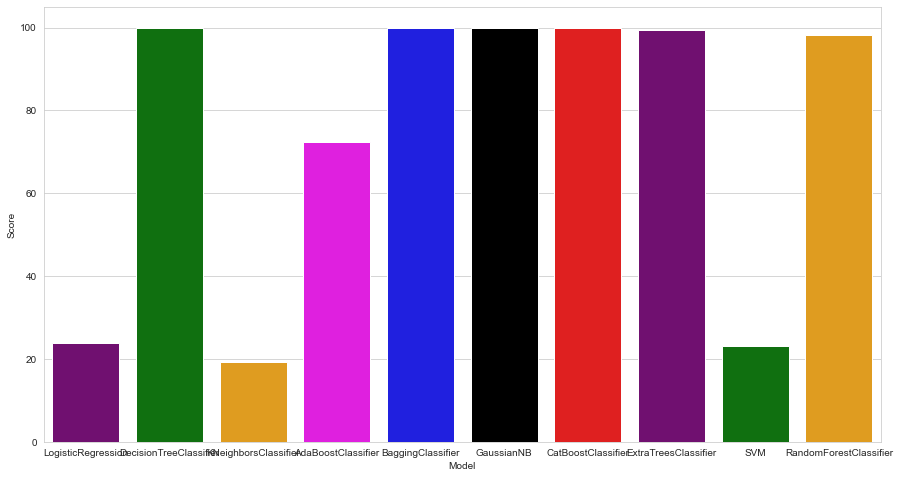

In [102]:
colors = ["purple", "green", "orange", "magenta","blue","black","red"]

sns.set_style("whitegrid")
plt.figure(figsize=(15,8))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=models['Model'],y=models['Score'], palette=colors )
plt.show()

In [103]:
df.head()

,age,job,marital,education,balance,housing,loan,day,month,duration,campaign,pdays,previous,deposit
0,59,0,1,1,2343,1,0,5,8,1042,1,-1,0,1
1,56,0,1,1,45,0,0,5,8,1467,1,-1,0,1
2,41,9,1,1,1270,1,0,5,8,1389,1,-1,0,1
3,55,7,1,1,2476,1,0,5,8,579,1,-1,0,1
4,54,0,1,2,184,0,0,5,8,673,2,-1,0,1


In [104]:
import sklearn.cluster as cluster
from sklearn.cluster import KMeans 

In [105]:
kmns=cluster.KMeans(n_clusters=5)
kmns.fit(df[['balance','deposit']])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [106]:
kmns.cluster_centers_

array([[4.62816632e+02, 4.43400603e-01],
       [3.37935320e+03, 5.80228515e-01],
       [9.20677679e+03, 5.75892857e-01],
       [6.09691250e+04, 6.25000000e-01],
       [2.33255634e+04, 4.92957746e-01]])

In [107]:
df['balance by deposit']=kmns.labels_

In [110]:
k_range=range(1,15)
wss=[]

In [111]:
for k in k_range:
    km=KMeans(n_clusters=k)
    km.fit(df[['balance','deposit']])
    wss.append(km.inertia_)

In [112]:
wss

[116111135008.7961,
 56600098219.685005,
 30298376440.48064,
 19450950260.78158,
 11012967024.746449,
 7910302593.274332,
 6243741360.256248,
 4890995717.935559,
 3884325300.916252,
 2907411283.003377,
 2456669138.5133877,
 2126049091.7364187,
 1841888358.0865602,
 1581900111.137631]

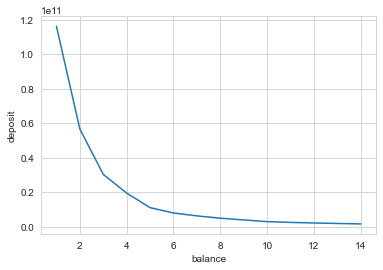

In [113]:
plt.xlabel('balance')
plt.ylabel('deposit')
plt.plot(k_range,wss)

In [114]:
df.columns

Index(['age', 'job', 'marital', 'education', 'balance', 'housing', 'loan',
       'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'deposit',
       'balance by deposit'],
      dtype='object')

<AxesSubplot:>

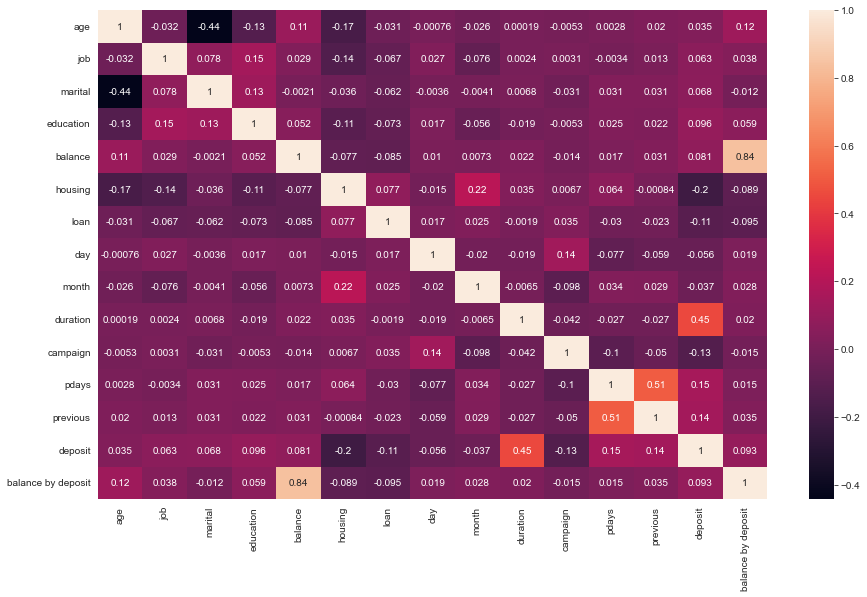

In [115]:
plt.figure(figsize=(15,9))
sns.heatmap(df.corr(),annot=True)

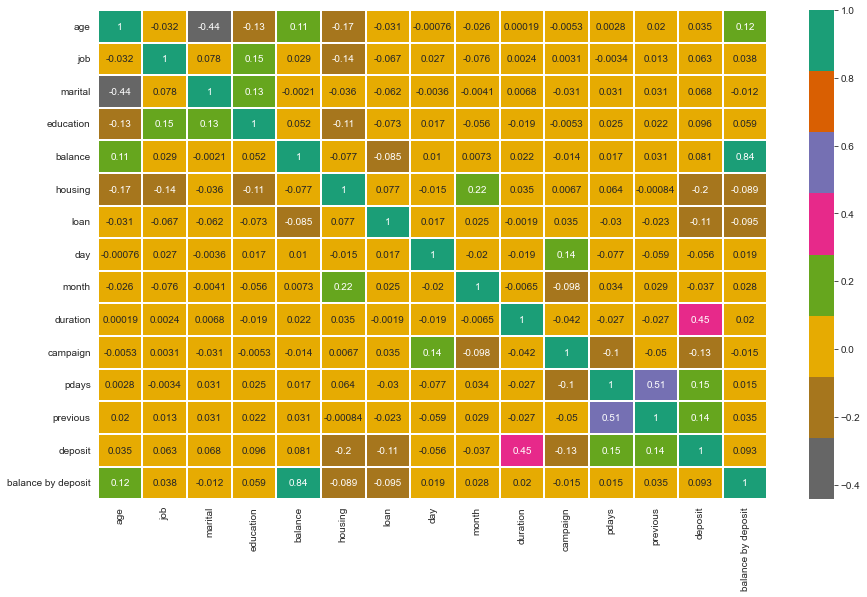

In [116]:
plt.figure(figsize=(15,9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(df.corr(),annot=True,cmap='Dark2_r',linewidths=2)
plt.show()

In [119]:
df.head()

,age,job,marital,education,balance,housing,loan,day,month,duration,campaign,pdays,previous,deposit,balance by deposit
0,59,0,1,1,2343,1,0,5,8,1042,1,-1,0,1,1
1,56,0,1,1,45,0,0,5,8,1467,1,-1,0,1,0
2,41,9,1,1,1270,1,0,5,8,1389,1,-1,0,1,0
3,55,7,1,1,2476,1,0,5,8,579,1,-1,0,1,1
4,54,0,1,2,184,0,0,5,8,673,2,-1,0,1,0


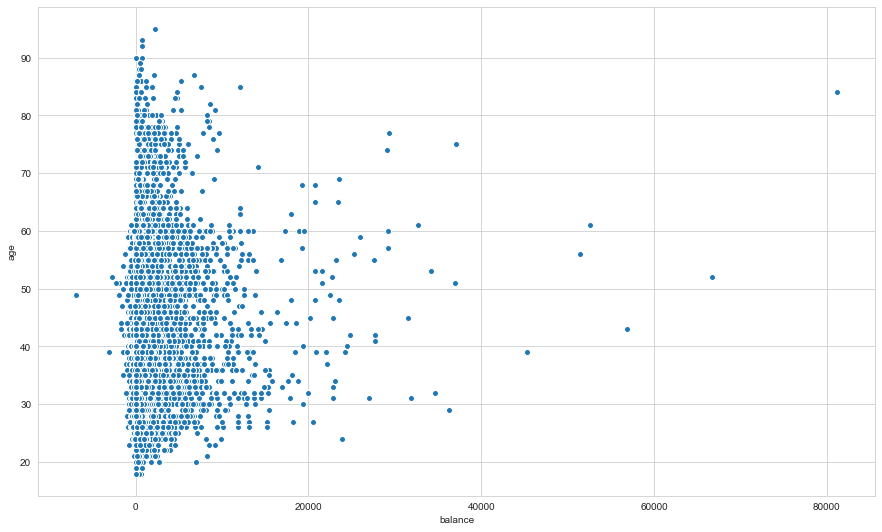

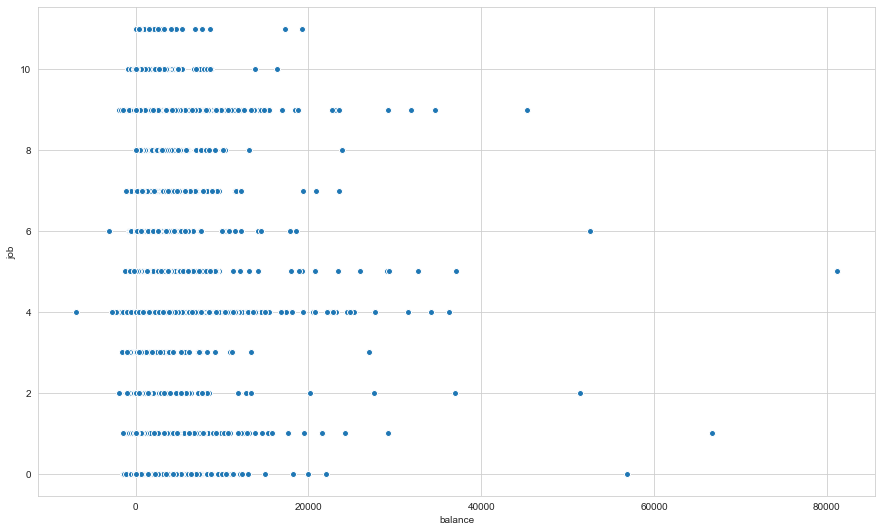

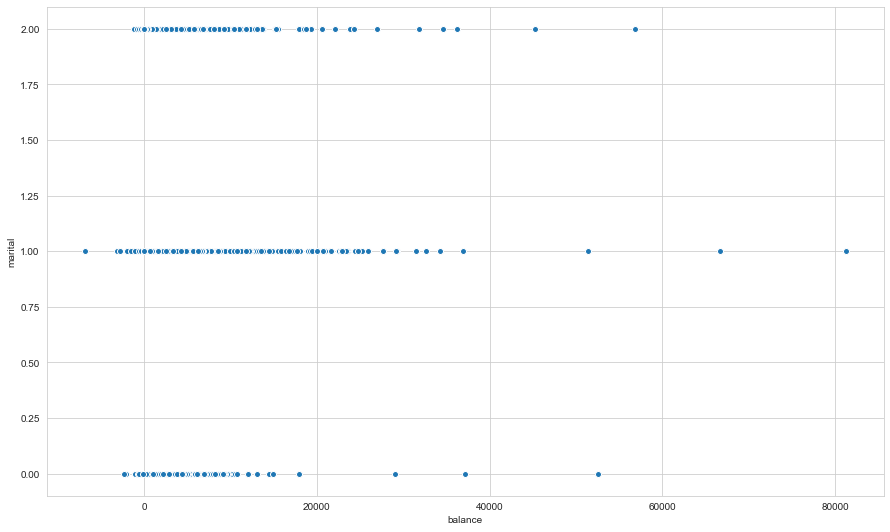

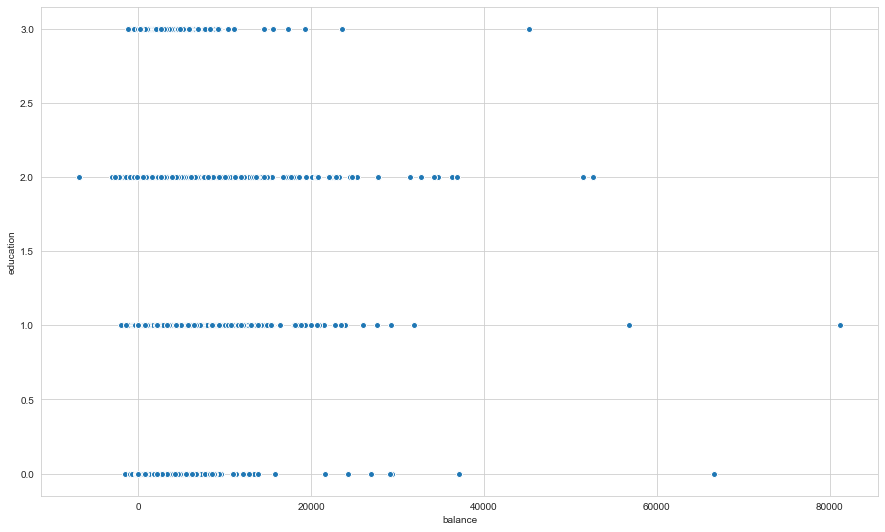

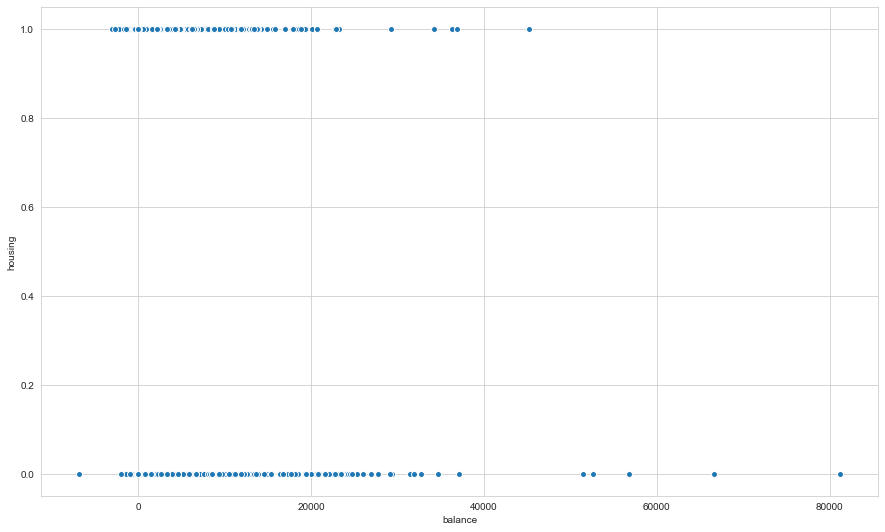

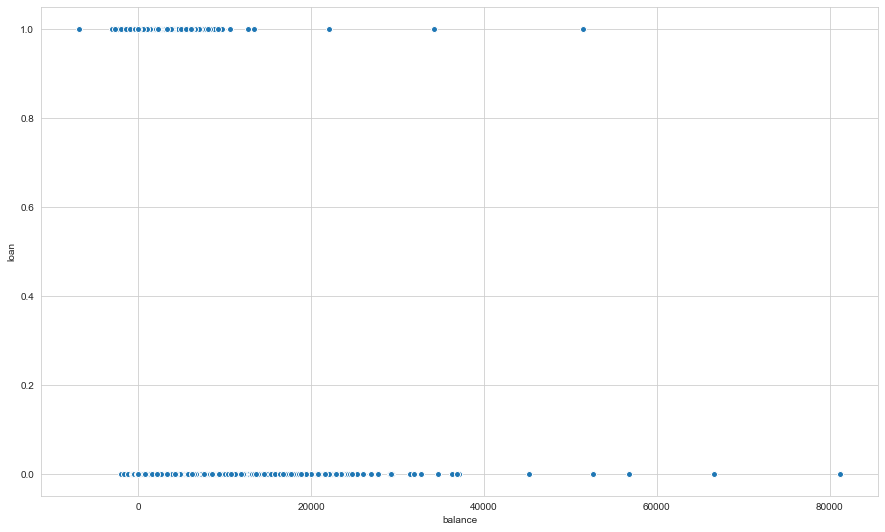

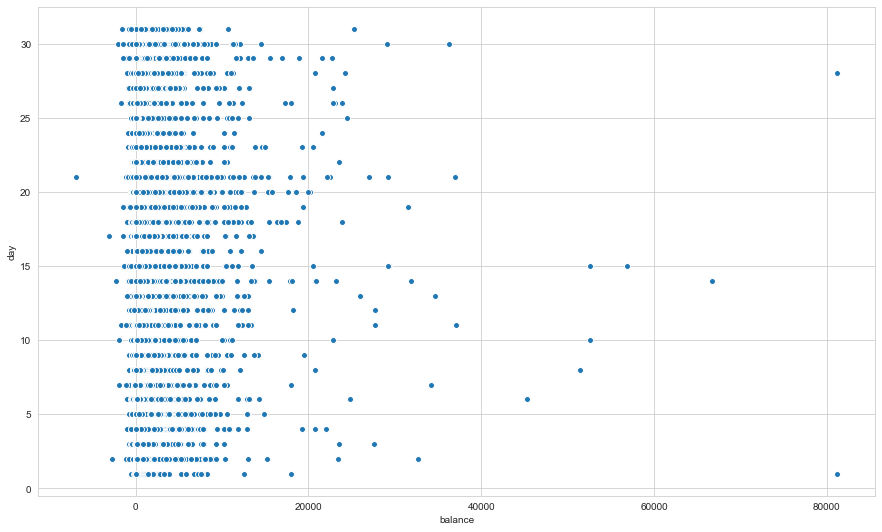

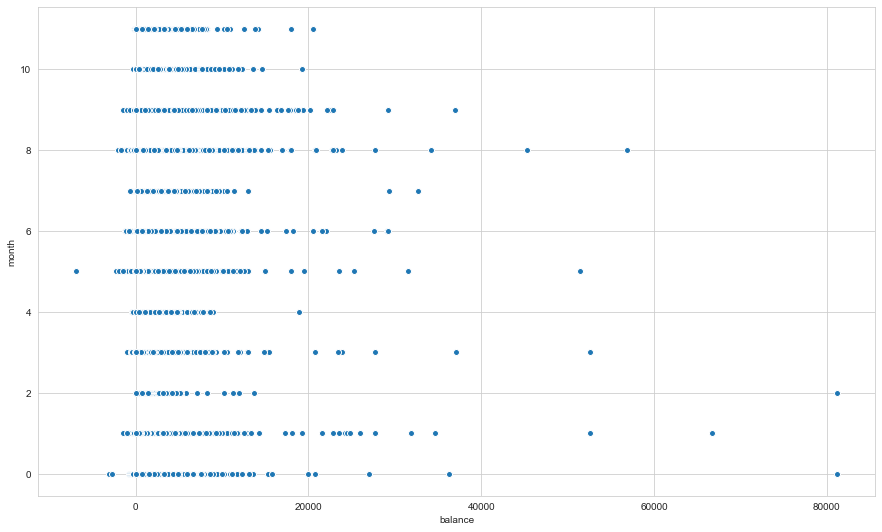

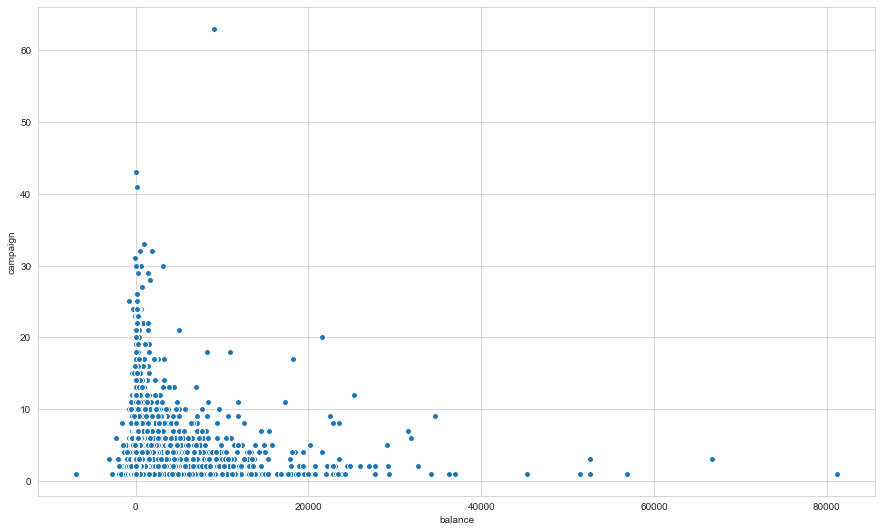

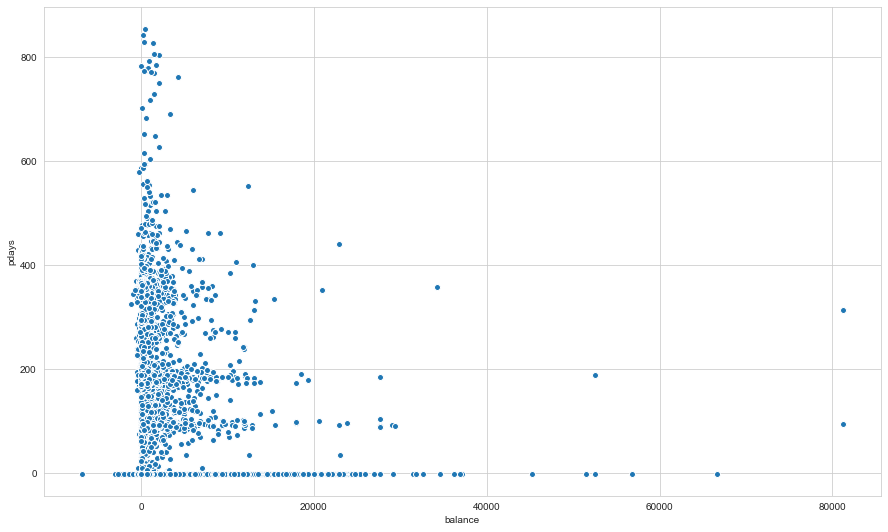

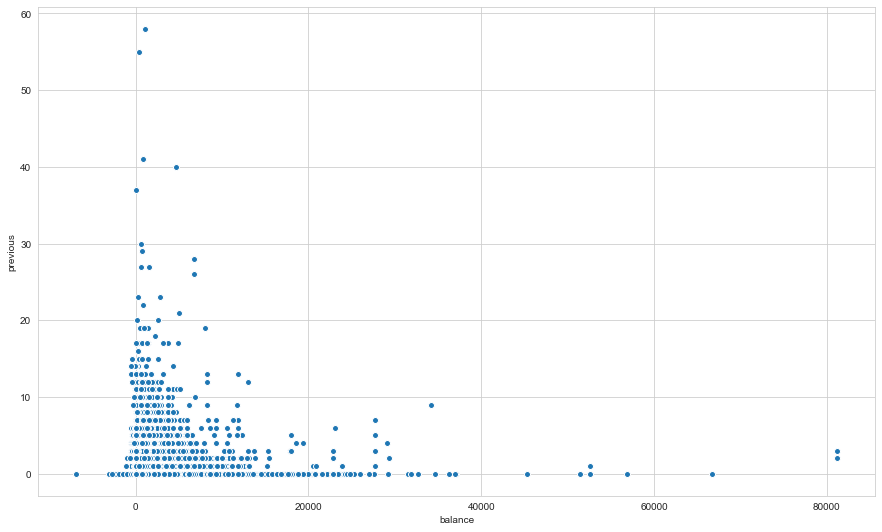

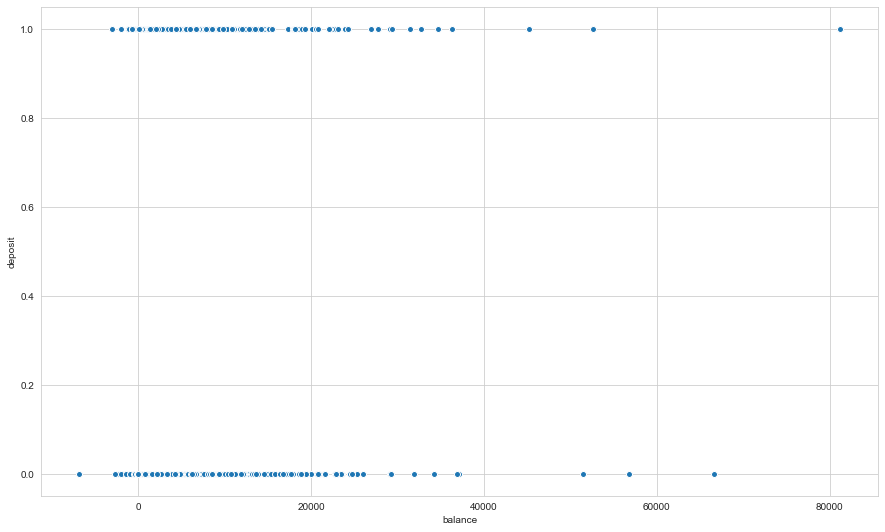

In [121]:
for i in ['age', 'job', 'marital', 'education', 'housing', 'loan',
       'day', 'month', 'campaign', 'pdays', 'previous', 'deposit']:
    plt.figure(figsize=(15,9))
    sns.scatterplot(x=df.balance,y=df[i],data=df,linewidth=1)
    plt.show()

In [125]:
import sweetviz as sv

In [126]:
data=sv.analyze(df)
data.show_html("Analyze.html")

                                             |                                             | [  0%]   00:00 ->…

Report Analyze.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [127]:
from IPython.display import IFrame

In [128]:
IFrame(src='Analyze.html',width=1000,height=600)

In [131]:
df[['pdays', 'campaign', 'previous']].describe()

,pdays,campaign,previous
count,11162.000000,11162.000000,11162.000000
mean,51.330407,2.508421,0.832557
std,108.758282,2.722077,2.292007
min,-1.000000,1.000000,0.000000
25%,-1.000000,1.000000,0.000000
50%,-1.000000,2.000000,0.000000
75%,20.750000,3.000000,1.000000
max,854.000000,63.000000,58.000000


In [132]:
len (df[df['pdays'] > 400] ) / len(df) * 100

1.2005017022039062

In [133]:
len (df[df['campaign'] > 34] ) / len(df) * 100

0.035835871707579285

In [134]:
len (df[df['previous'] > 34] ) / len(df) * 100

0.04479483963447411

In [136]:
df.columns

Index(['age', 'job', 'marital', 'education', 'balance', 'housing', 'loan',
       'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'deposit',
       'balance by deposit'],
      dtype='object')

<AxesSubplot:xlabel='deposit', ylabel='count'>

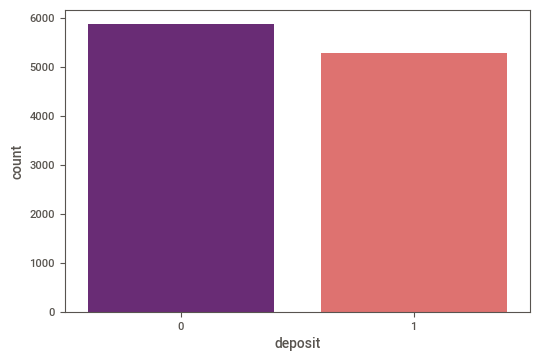

In [137]:
sns.countplot(x='deposit',data=df,palette='magma')

<AxesSubplot:xlabel='count', ylabel='job'>

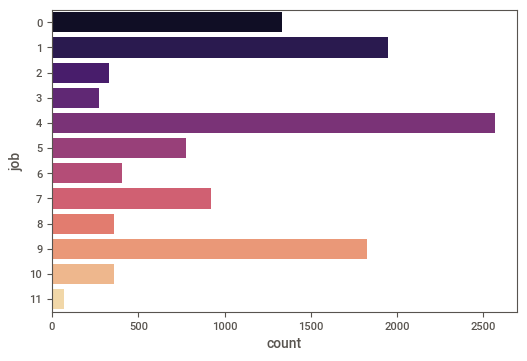

In [140]:
sns.countplot(y='job',data=df,palette='magma')

<Figure size 20000x20000 with 0 Axes>

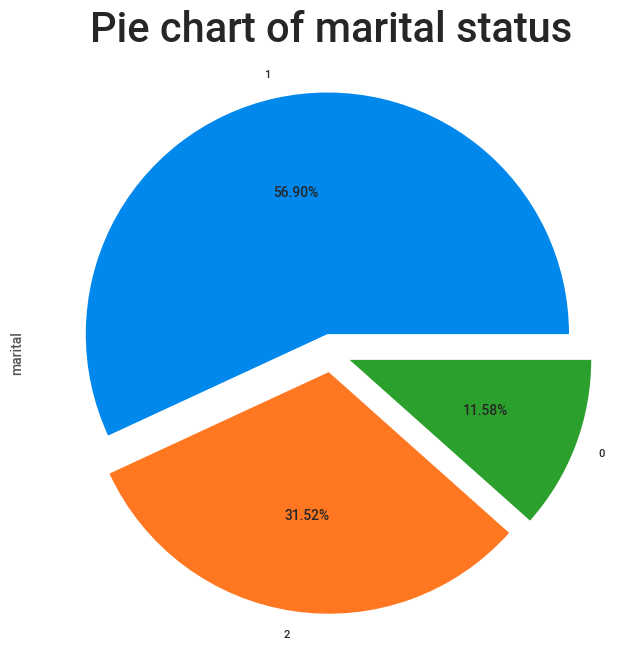

In [142]:
explode=(0.08,0.08,0.08)
fig = plt.figure(figsize=(200, 200))
plt.figure(figsize=(10,7))
df['marital'].value_counts().plot.pie(autopct='%1.2f%%',figsize=(8,8),explode=explode)
plt.title("Pie chart of marital status", fontsize=30)
plt.show()

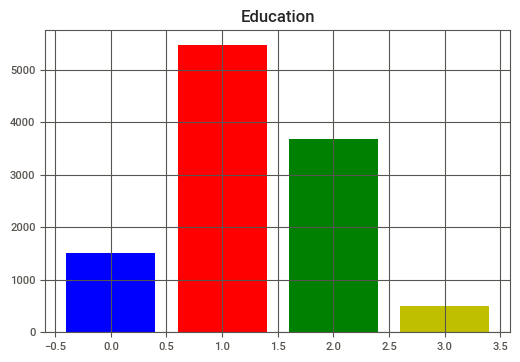

In [144]:
plt.bar(df['education'].unique(), df["education"].value_counts(), color = ['r', 'g','b','y'])
plt.title("Education")
plt.grid(True)

deposit      0     1
campaign            
1         2237  2561
2         1627  1401
3          703   618
4          454   317
5          239   139
6          173    92
7           92    47
8           96    32
9           51    21
10          38    14
11          24    16
12          25     4
13          24     6
14          11     4
15           9     4
16           7     2
17           8     6
18           8     0
19           5     0
20           4     1
21           7     1
22           4     0
23           3     0
24           4     1
25           3     0
26           3     0
27           1     0
28           1     0
29           1     1
30           4     0
31           1     0
32           1     1
33           1     0
41           1     0
43           2     0
63           1     0


Text(0.5, 1.0, 'PRODUCT BY GENDER')

<Figure size 1000x1000 with 0 Axes>

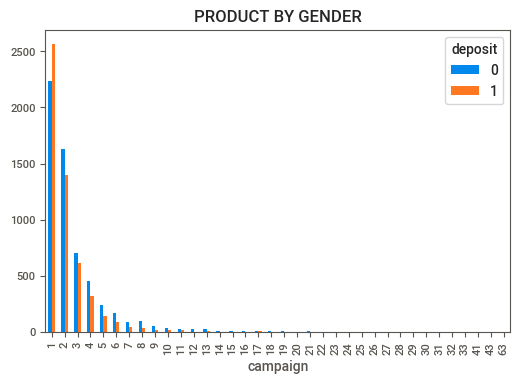

In [145]:
plt.figure(figsize=(10,10))
prd_gender=pd.crosstab(df['campaign'],df['deposit'] )
print(prd_gender)

ax=prd_gender.plot(kind='bar')
plt.title("PRODUCT BY GENDER")

In [146]:
#balance and deposit

b_df = pd.DataFrame()
b_df['balance_yes'] = (df[df['deposit'] == 'yes'][['deposit','balance']].describe())['balance']
b_df['balance_no'] = (df[df['deposit'] == 'no'][['deposit','balance']].describe())['balance']

b_df

,balance_yes,balance_no
count,0.0,0.0
mean,NaN,NaN
std,NaN,NaN
min,NaN,NaN
25%,NaN,NaN
50%,NaN,NaN
75%,NaN,NaN
max,NaN,NaN


In [147]:
df.head()

,age,job,marital,education,balance,housing,loan,day,month,duration,campaign,pdays,previous,deposit,balance by deposit
0,59,0,1,1,2343,1,0,5,8,1042,1,-1,0,1,1
1,56,0,1,1,45,0,0,5,8,1467,1,-1,0,1,0
2,41,9,1,1,1270,1,0,5,8,1389,1,-1,0,1,0
3,55,7,1,1,2476,1,0,5,8,579,1,-1,0,1,1
4,54,0,1,2,184,0,0,5,8,673,2,-1,0,1,0


In [148]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [149]:
df.columns

Index(['age', 'job', 'marital', 'education', 'balance', 'housing', 'loan',
       'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'deposit',
       'balance by deposit'],
      dtype='object')

In [150]:
man=MinMaxScaler()
feat=['age', 'job', 'marital', 'education', 'balance', 'housing', 'loan',
       'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'deposit']
df[feat]=man.fit_transform(df[feat])
df[feat]

,age,job,marital,education,balance,housing,loan,day,month,duration,campaign,pdays,previous,deposit
0,0.532468,0.000000,0.5,0.333333,0.104371,1.0,0.0,0.133333,0.727273,0.268110,0.000000,0.000000,0.000000,1.0
1,0.493506,0.000000,0.5,0.333333,0.078273,0.0,0.0,0.133333,0.727273,0.377675,0.000000,0.000000,0.000000,1.0
2,0.298701,0.818182,0.5,0.333333,0.092185,1.0,0.0,0.133333,0.727273,0.357566,0.000000,0.000000,0.000000,1.0
3,0.480519,0.636364,0.5,0.333333,0.105882,1.0,0.0,0.133333,0.727273,0.148750,0.000000,0.000000,0.000000,1.0
4,0.467532,0.000000,0.5,0.666667,0.079851,0.0,0.0,0.133333,0.727273,0.172983,0.016129,0.000000,0.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,0.194805,0.090909,1.0,0.000000,0.077773,1.0,0.0,0.633333,0.000000,0.065739,0.000000,0.000000,0.000000,0.0
11158,0.272727,0.636364,0.5,0.333333,0.086086,0.0,0.0,0.500000,0.545455,0.020882,0.048387,0.000000,0.000000,0.0
11159,0.181818,0.818182,1.0,0.333333,0.078091,0.0,0.0,0.600000,0.090909,0.039701,0.016129,0.000000,0.000000,0.0
11160,0.324675,0.818182,0.5,0.333333,0.077762,0.0,1.0,0.233333,0.727273,0.001805,0.016129,0.202339,0.086207,0.0


In [151]:
std=StandardScaler()
feat=['age', 'job', 'marital', 'education', 'balance', 'housing', 'loan',
       'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'deposit']
df[feat]=std.fit_transform(df[feat])
df[feat]

,age,job,marital,education,balance,housing,loan,day,month,duration,campaign,pdays,previous,deposit
0,1.491505,-1.391604,-0.318672,-0.380501,0.252525,1.055280,-0.387923,-1.265746,0.800268,1.930226,-0.554168,-0.481184,-0.363260,1.053764
1,1.239676,-1.391604,-0.318672,-0.380501,-0.459974,-0.947616,-0.387923,-1.265746,0.800268,3.154612,-0.554168,-0.481184,-0.363260,1.053764
2,-0.019470,1.399105,-0.318672,-0.380501,-0.080160,1.055280,-0.387923,-1.265746,0.800268,2.929901,-0.554168,-0.481184,-0.363260,1.053764
3,1.155733,0.778947,-0.318672,-0.380501,0.293762,1.055280,-0.387923,-1.265746,0.800268,0.596366,-0.554168,-0.481184,-0.363260,1.053764
4,1.071790,-1.391604,-0.318672,0.953822,-0.416876,-0.947616,-0.387923,-1.265746,0.800268,0.867171,-0.186785,-0.481184,-0.363260,1.053764
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,-0.691015,-1.081525,1.279987,-1.714823,-0.473616,1.055280,-0.387923,0.515650,-1.706158,-0.331287,-0.554168,-0.481184,-0.363260,-0.948979
11158,-0.187357,0.778947,-0.318672,-0.380501,-0.246658,-0.947616,-0.387923,0.040612,0.173661,-0.832564,0.547981,-0.481184,-0.363260,-0.948979
11159,-0.774958,1.399105,1.279987,-0.380501,-0.464934,-0.947616,-0.387923,0.396891,-1.392855,-0.622258,-0.186785,-0.481184,-0.363260,-0.948979
11160,0.148416,1.399105,-0.318672,-0.380501,-0.473926,-0.947616,2.577830,-0.909466,0.800268,-1.045752,-0.186785,1.109571,1.818332,-0.948979
